# Week 15 Activity

In [3]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
#Reading the dataset to python environment

data = pd.read_csv(r"titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#to check for the dimension of the data

data.shape

(891, 12)

In [6]:
#to find the features of the data

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#basic info of the dataset

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Checking the data types of different features

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
#checking for null values in the data set

data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filling missing values

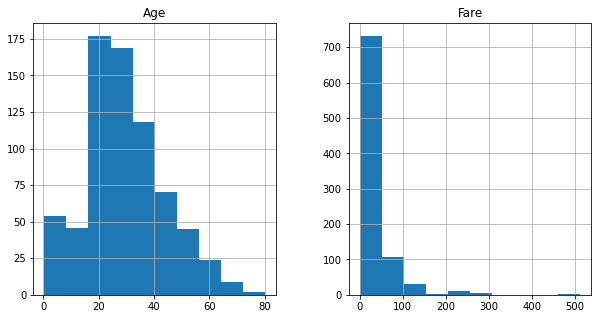

In [15]:
import matplotlib.pyplot as plt
freqgraph = data.select_dtypes(include=['float'])     
freqgraph.hist(figsize=(10,5))
plt.show()

In [16]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [17]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data.Cabin.nunique()

147

In [19]:
data.Embarked.nunique()

3

In [20]:
data.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [21]:
data.Embarked.mode()

0    S
dtype: object

In [22]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [23]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Handling outliers

In [24]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

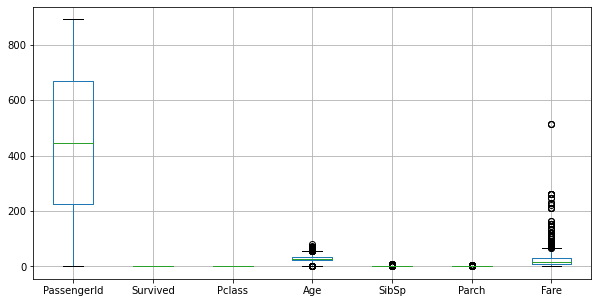

In [26]:
#Finding outliers
graph=data.select_dtypes(include=['int64','float64','int32'])
graph.boxplot(figsize=(10,5))
plt.show()

In [27]:
import warnings
warnings.filterwarnings("ignore")
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

Age             66
Cabin            0
Embarked         0
Fare           116
Name             0
Parch          213
PassengerId      0
Pclass           0
Sex              0
SibSp           46
Survived         0
Ticket           0
dtype: int64


In [28]:
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Age'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 

In [29]:
print(low_lim)
print(up_lim)

2.5
54.5


In [30]:
outlier =[] 
for x in data['Age']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x)
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [31]:
ind1 = data['Age']<low_lim
data.loc[ind1].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [32]:
ind2 = data['Age']>up_lim
data.loc[ind2].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [33]:
data.drop([ 7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831,11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879], inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

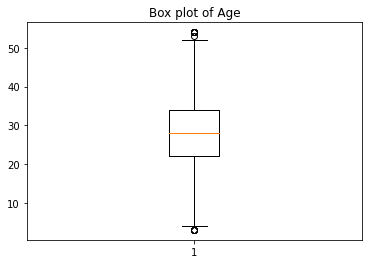

In [34]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [35]:
Q1 = np.percentile(data['SibSp'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['SibSp'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['SibSp'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 

In [36]:
ind1 = data['SibSp']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [37]:
ind2 = data['SibSp']>up_lim
data.loc[ind2].index

Int64Index([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],
           dtype='int64')

In [38]:
data.drop([24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

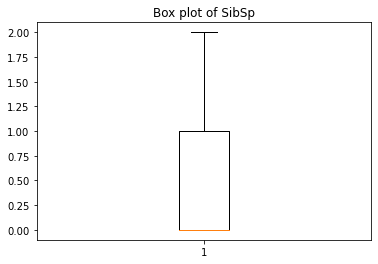

In [39]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [40]:
Q1 = np.percentile(data['Fare'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Fare'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Fare'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR

In [41]:
print(low_lim)
print(up_lim)

-21.885499999999997
57.5313


In [42]:
outlier =[] 
for x in data['Fare']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x)
print(outlier)

[71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 61.175, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 61.3792, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 135.6333, 57.9792, 153.4625, 133.65, 66.6, 134.5, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 59.4, 93.5, 57.9792, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 120.0, 93.5, 83.1583, 89.1042, 164.8667]


In [43]:
ind1 = data['Fare']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [44]:
ind2 = data['Fare']>up_lim
data.loc[ind2].index

Int64Index([  1,  31,  34,  52,  61,  62,  72,  92,  97, 102,
            ...
            759, 763, 765, 779, 789, 802, 820, 835, 849, 856],
           dtype='int64', length=102)

In [45]:
data.drop([  1,  31,  34,  52,  61,  62,  72,  92,  97, 102,759, 763, 765, 779, 789, 802, 820, 835, 849, 856],inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

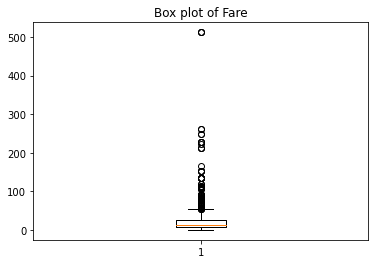

In [46]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

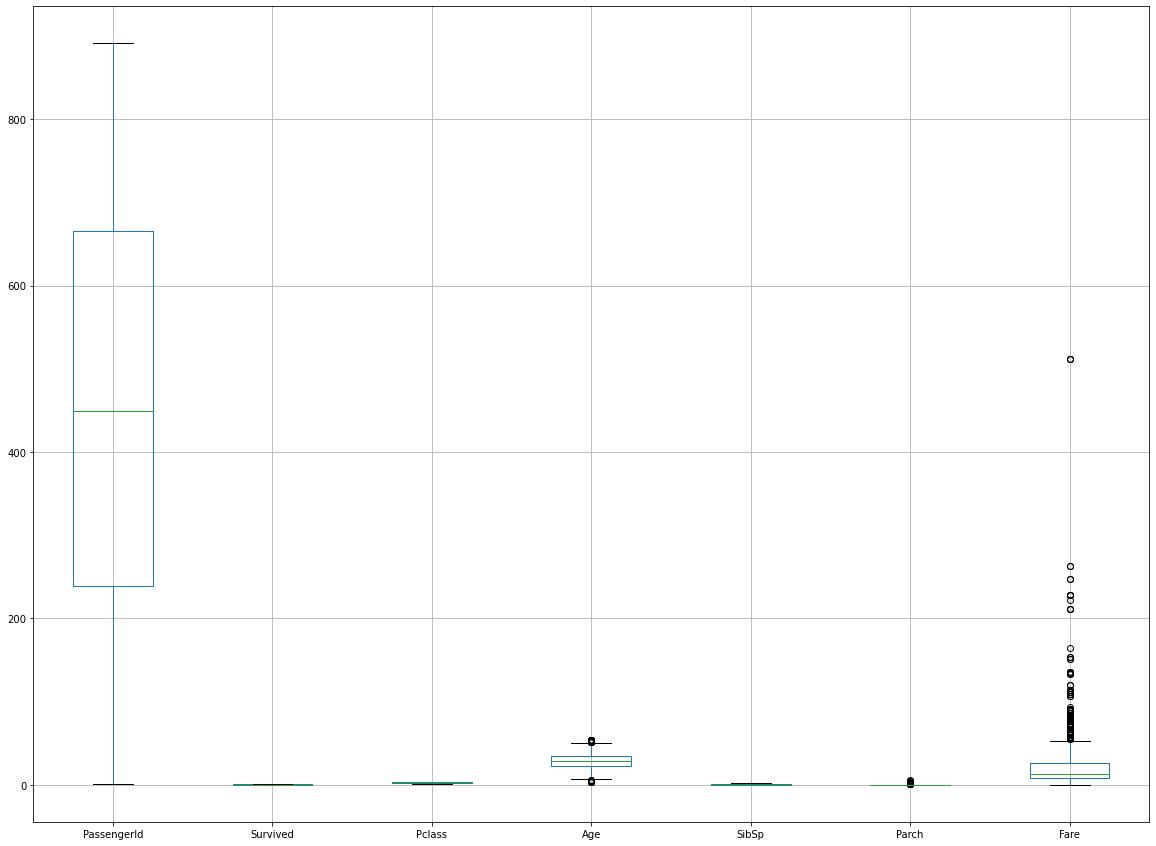

In [47]:
#Checking for outliers again
graph=data.select_dtypes(include=['int64','float64','int32'])
graph.boxplot(figsize=(20,15))
plt.show()

Encoding

In [48]:
data = pd.get_dummies(data)

In [49]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,28.0,0,0,8.4583,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
Y = data['Survived']
X = data.drop('Survived', axis=1)

In [51]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,...,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,451.088773,2.351175,28.933420,0.302872,0.291123,28.552501,0.001305,0.001305,0.001305,0.001305,...,0.002611,0.002611,0.003916,0.001305,0.001305,0.003916,0.001305,0.187990,0.091384,0.720627
std,251.584479,0.812109,9.708739,0.526095,0.758464,48.006645,0.036131,0.036131,0.036131,0.036131,...,0.051064,0.051064,0.062500,0.036131,0.036131,0.062500,0.036131,0.390959,0.288342,0.448984
min,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,239.250000,2.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,449.500000,3.000000,28.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,665.750000,3.000000,34.000000,1.000000,0.000000,26.550000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,3.000000,54.000000,2.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1)) 
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X)

In [53]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,...,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,0.505718,0.675587,0.508498,0.151436,0.048520,0.055731,0.001305,0.001305,0.001305,0.001305,...,0.002611,0.002611,0.003916,0.001305,0.001305,0.003916,0.001305,0.187990,0.091384,0.720627
std,0.282679,0.406055,0.190367,0.263048,0.126411,0.093703,0.036131,0.036131,0.036131,0.036131,...,0.051064,0.051064,0.062500,0.036131,0.036131,0.062500,0.036131,0.390959,0.288342,0.448984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.267697,0.500000,0.392157,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.503933,1.000000,0.490196,0.000000,0.000000,0.025374,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.746910,1.000000,0.607843,0.500000,0.000000,0.051822,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

# NAIVE BAYES CLASSIFIER

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred),sep='\n')
print(confusion_matrix(Y_test, Y_pred),sep='\n')

              precision    recall  f1-score   support

           0       0.67      0.14      0.23       147
           1       0.36      0.88      0.52        83

    accuracy                           0.40       230
   macro avg       0.52      0.51      0.37       230
weighted avg       0.56      0.40      0.33       230

[[ 20 127]
 [ 10  73]]


In [57]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred,Y_test))

accuracy is 0.4043478260869565


# Hyper tuning

In [58]:
# fitting Bernoulli Naive Bayes to training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

In [59]:
accuracy_score(Y_test,Y_pred)

0.7782608695652173

In [60]:
cm=confusion_matrix(Y_pred,Y_test)
cm

array([[129,  33],
       [ 18,  50]], dtype=int64)

It is seen that the accuracy has increased to 77% after hyper tuning.